US GOVT REVENUE ANALYSIS


In [1]:
import pandas as pd

# Load data
df = pd.read_excel('Book.xlsx')

# Remove the 'Net Collections Amount' column
df.drop(columns=['Net Collections Amount'], inplace=True)

# Display the first few rows of the modified dataset
print(df.head())


  Record Date Electronic Category Description Channel Type Description  \
0  2024-12-30                  Non-Electronic                     Mail   
1  2024-12-30           Electronic Settlement   Over-the-Counter (OTC)   
2  2024-12-30                  Non-Electronic   Over-the-Counter (OTC)   
3  2024-12-30          Fully Electronic - All                     Bank   
4  2024-12-30                  Non-Electronic   Over-the-Counter (OTC)   

  Tax Category Description  Electronic Category ID  Channel Type ID  \
0                  Non-Tax                       4                2   
1                  Non-Tax                       3                1   
2                  Non-Tax                       4                1   
3                  IRS Tax                       1                5   
4                  IRS Tax                       4                1   

   Tax Category ID  Source Line Number  Fiscal Year  Fiscal Quarter Number  \
0                1                   1         202

In [2]:
df.head(5)

,Record Date,Electronic Category Description,Channel Type Description,Tax Category Description,Electronic Category ID,Channel Type ID,Tax Category ID,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number,Type,Revenue
0,2024-12-30,Non-Electronic,Mail,Non-Tax,4,2,1,1,2025,1,2024,4,12,30,Collection,211.84
1,2024-12-30,Electronic Settlement,Over-the-Counter (OTC),Non-Tax,3,1,1,2,2025,1,2024,4,12,30,Collection,19973.12
2,2024-12-30,Non-Electronic,Over-the-Counter (OTC),Non-Tax,4,1,1,3,2025,1,2024,4,12,30,Collection,10964253.95
3,2024-12-30,Fully Electronic - All,Bank,IRS Tax,1,5,3,4,2025,1,2024,4,12,30,Collection,2341201.73
4,2024-12-30,Non-Electronic,Over-the-Counter (OTC),IRS Tax,4,1,3,5,2025,1,2024,4,12,30,Collection,14247547.02


CLASSIFICATION REPORT USING RANDOM FOREST CLASSIFIER

Classification Report:
              precision    recall  f1-score   support

        High       0.90      0.97      0.93      1157
         Low       0.99      0.84      0.91      1152
      Medium       0.83      0.90      0.86      1171

    accuracy                           0.90      3480
   macro avg       0.91      0.90      0.90      3480
weighted avg       0.91      0.90      0.90      3480

Accuracy: 0.90


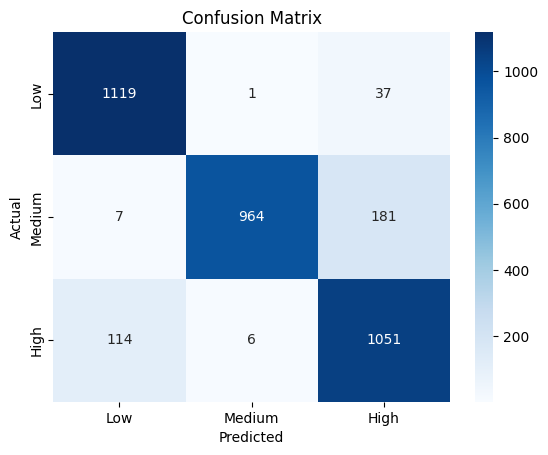

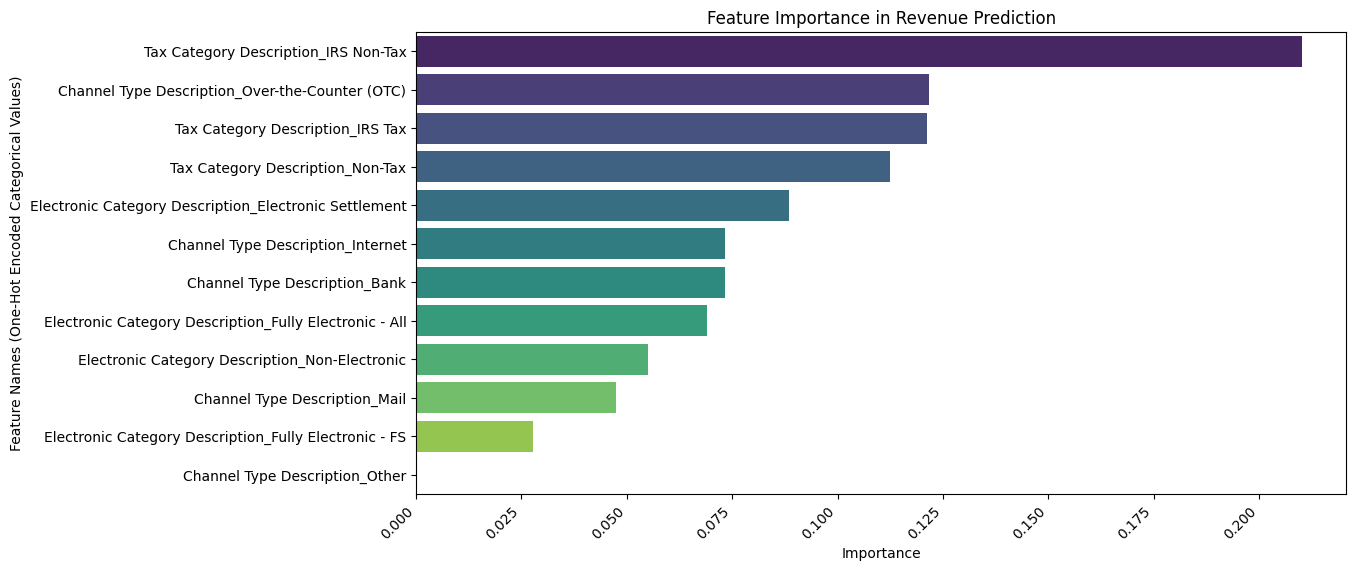

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset
df = pd.read_excel("Book.xlsx", sheet_name='USGovtRevCollect_20191231_20241')

# Drop 'Record Date' as per instruction
df = df.drop(columns=['Record Date'])

# Handle categorical variables using One-Hot Encoding
categorical_cols = ['Electronic Category Description', 'Channel Type Description', 'Tax Category Description', 'Type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Log transformation to normalize Revenue
df['Revenue_Log'] = np.log1p(df['Revenue'])
df = df[df['Type_Collection'] == 1]  # Assuming 'Type_Collection' column is a boolean (True/False)


# Splitting into features and target for classification
df['Revenue_Category'] = pd.qcut(df['Revenue'], q=3, labels=['Low', 'Medium', 'High'])  # Binning revenue
X = df.drop(columns=['Revenue', 'Revenue_Log', 'Revenue_Category', 'Channel Type ID', 'Electronic Category ID', 'Tax Category ID','Source Line Number', 'Net Collections Amount','Calendar Day Number','Calendar Quarter Number','Calendar Month Number','Calendar Year','Fiscal Year','Fiscal Quarter Number','Type_Collection','Type_Refund'])   # Use one-hot encoded categorical features
Y = df['Revenue_Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification Model (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Classification Results
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Plot
importances = clf.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")
plt.title("Feature Importance in Revenue Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature Names (One-Hot Encoded Categorical Values)")
plt.xticks(rotation=45, ha='right')
plt.show()


LOGISTIC REGRESSION


In [48]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Classification Results for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Accuracy for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.84      0.97      0.90      1157
         Low       0.81      0.63      0.71      1152
      Medium       0.73      0.78      0.75      1171

    accuracy                           0.79      3480
   macro avg       0.79      0.79      0.79      3480
weighted avg       0.79      0.79      0.79      3480

Logistic Regression Accuracy: 0.79


SVM (SUPPORT VECTOR MACHINES)

In [52]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Classification Results for SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")


SVM Classification Report:
              precision    recall  f1-score   support

        High       0.90      0.97      0.93      1157
         Low       0.99      0.84      0.91      1152
      Medium       0.83      0.90      0.86      1171

    accuracy                           0.90      3480
   macro avg       0.91      0.90      0.90      3480
weighted avg       0.91      0.90      0.90      3480

SVM Accuracy: 0.90


VOTING CLASSIFIER

In [50]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier using Random Forest, Logistic Regression, and Gradient Boosting
voting_clf = VotingClassifier(estimators=[('rf', clf), ('lr', log_reg), ('gb', gb)], voting='hard')
voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)

# Classification Report for Voting Classifier
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))

# Accuracy for Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.2f}")


Voting Classifier Classification Report:
              precision    recall  f1-score   support

        High       0.90      0.97      0.93      1157
         Low       0.99      0.84      0.91      1152
      Medium       0.83      0.90      0.86      1171

    accuracy                           0.90      3480
   macro avg       0.91      0.90      0.90      3480
weighted avg       0.91      0.90      0.90      3480

Voting Classifier Accuracy: 0.90
